In [48]:
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dotenv
import os
import datetime
import pytz

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Set up variables
dotenv.load_dotenv()
api_key = os.environ.get("api_key")
base_url = "https://api.breathelondon.org/api"

True

In [6]:
# Load all sensors
response = requests.get(f"{base_url}/ListSensors?key={api_key}", headers={"Content-Type": "application/json"})
sensors = pd.json_normalize(response.json()[0])
sensors

,SiteCode,SiteName,Latitude,Longitude,LocalAuthorityID,SiteClassification,HeadHeight,ToRoad,SiteLocationType,Indoor,...,LatestRELHUMValue,LatestTEMPERATValue,SiteActive,SiteGroup,PowerTag,Enabled,OtherTags,OrganisationName,SponsorName,HourlyBulletinEnd
0,CLDP0001,Royal London University Hospital,51.518776,-0.059464,None,Urban Background,2.4,30.00,Hospital,0,...,None,None,1,GLA,Solar,Y,"Deployed, GLA, Solar300, Tower Hamlets, V1",Mayor of London,Mayor of London,Feb 11 2023 5:00PM
1,CLDP0002,North Middlesex University Hospital,51.613045,-0.075392,None,Roadside,2.1,4.80,Hospital,0,...,None,None,1,GLA,Mains,Y,"Deployed, GLA, Haringey, V1",Mayor of London,Mayor of London,Feb 11 2023 5:00PM
2,CLDP0003,Newham University Hospital,51.523209,0.033944,None,Urban Background,2.7,7.00,Hospital,0,...,None,None,1,GLA,Solar,Y,"Deployed, GLA, Newham, Solar300, V1",Mayor of London,Mayor of London,Feb 11 2023 5:00PM
3,CLDP0004,Whipps Cross Hospital,51.579426,0.001091,None,Urban Background,3.4,15.00,Hospital,0,...,None,None,1,GLA,Solar,Y,"Deployed, GLA, Solar300, V1, Waltham Forest",Mayor of London,Mayor of London,Feb 11 2023 5:00PM
4,CLDP0005,Charing Cross Hospital,51.487350,-0.221560,None,Urban Background,3.5,12.00,Hospital,0,...,None,None,1,GLA,Mains,Y,"Deployed, GLA, Hammersmith and Fulham, V1",Mayor of London,Mayor of London,Feb 11 2023 5:00PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,CLDP0423,Houston Road,51.434383,-0.035958,None,Roadside,2.9,2.50,None,0,...,None,None,1,Bell Green,Solar,Y,"Bell Green Neighbourhood Forum, Deployed, Lewi...",Bell Green Community Forum,Lewisham,Feb 11 2023 5:00PM
408,CLDP0424,Ridgeway Gardens,51.581619,0.052150,None,Roadside,3.3,0.51,None,0,...,None,None,1,Redbridge School Streets,Solar,Y,"Deployed, Redbridge, School Streets, Solar300, V2",Redbridge,Redbridge,Feb 11 2023 5:00PM
409,CLDP0425,Trenance Gardens,51.557220,0.105310,None,Roadside,3.3,2.80,None,0,...,None,None,1,Redbridge School Streets,Solar,Y,"Deployed, Redbridge, School Streets, Solar300, V2",Redbridge,Redbridge,Feb 11 2023 5:00PM
410,CLDP0426,Loughdon Road,51.580711,0.075680,None,Roadside,3.3,0.56,None,0,...,None,None,1,Redbridge School Streets,Solar,Y,"Deployed, Redbridge, School Streets, Solar300, V2",Redbridge,Redbridge,Feb 11 2023 5:00PM


In [4]:
# sensors.iloc[0]
sensors[sensors['SiteName'].str.contains("bri")]

,SiteCode,SiteName,Latitude,Longitude,LocalAuthorityID,SiteClassification,HeadHeight,ToRoad,SiteLocationType,Indoor,...,LatestRELHUMValue,LatestTEMPERATValue,SiteActive,SiteGroup,PowerTag,Enabled,OtherTags,OrganisationName,SponsorName,HourlyBulletinEnd
43,CLDP0046,Redbridge Leystreet(West) BLEN,51.570671,0.083690,None,,NaN,2.00,None,0,...,None,None,0,,Solar,N,None,Mayor of London,Mayor of London,Dec 17 2022 8:00AM
95,CLDP0109,Whipps Cross/ A12 Cambridge Park Road,51.572224,0.018235,None,Roadside,2.6,0.50,None,0,...,None,None,1,GLA,Solar,Y,"Deployed, Hotspot, Solar300, TfL, V1, Waltham ...",Mayor of London,Mayor of London,Dec 17 2022 8:00AM
107,CLDP0121,Redbridge Ley Street BLEN,51.569729,0.083675,None,Roadside,2.7,0.50,None,0,...,None,None,1,GLA,Solar,Y,"BLEN, Deployed, Redbridge, Solar300, V1",Mayor of London,Mayor of London,Dec 17 2022 8:00AM
128,CLDP0142,"Burtons Road, Hampton Hill, west of j/w Albert...",51.430832,-0.356738,None,Roadside,2.2,1.00,None,0,...,None,None,1,SLP-Richmond,Solar,Y,"Aerial Broken, Richmond upon Thames, Solar300,...",South London Partnership,South London Partnership,Dec 17 2022 8:00AM
147,CLDP0161,Redbridge-South Woodford,51.592270,0.027149,None,Roadside,2.7,0.60,None,0,...,None,None,1,GLA,Solar,Y,"Deployed, Quid Pro Quo, Redbridge, Solar300, V1",Mayor of London,Mayor of London,Dec 17 2022 8:00AM
153,CLDP0167,Redbridge-Gants Hill,51.576000,0.066301,None,Roadside,NaN,0.70,None,0,...,None,None,1,GLA,Solar,Y,"Deployed, Redbridge, Solar300, V1",None,None,Dec 17 2022 8:00AM
170,CLDP0184,"Twickenham railway bridge, London Rd, Twickenham",51.449490,-0.330053,None,Roadside,2.3,0.70,None,0,...,None,None,1,SLP-Richmond,Solar,Y,"Deployed, Richmond upon Thames, Solar300, Sout...",South London Partnership,South London Partnership,Dec 17 2022 8:00AM
246,CLDP0260,Cambridge Rd,51.414349,-0.231410,None,Roadside,2.4,0.25,None,0,...,None,None,1,SLP-Merton,Solar,Y,"Deployed, Merton, Solar300, South London Partn...",None,South London Partnership,Dec 17 2022 8:00AM


In [ ]:
# Load a single sensor info
sensor = "CLDP0001"
response = requests.get(f"{base_url}/Sensor/{sensor}?key={api_key}", headers={"Content-Type": "application/json"})
sensor = pd.json_normalize(response.json())
# response.json()
sensor.transpose()


In [95]:
# Load data from a single sensor

def get_data_series(site_code, start_time, end_time, species):
    averaging = "Hourly"
    
    response = requests.get(f"{base_url}/getClarityData/{site_code}/{species}/{start_time}/{end_time}/{averaging}?key={api_key}", headers={"Content-Type": "application/json"})

    # We might not get any data - just return an empty DF
    if len(response.json()) == 0:
        return pd.DataFrame(columns=["SiteCode","DateTime", "ScaledValue"])
    
    data = pd.json_normalize(response.json())
    return data[["SiteCode","DateTime", "ScaledValue"]]
    


In [64]:
# Load PM2.5 and NO2 data from a sensor and return as a merged data frame
def get_sensor_data(site_code, start_time, end_time):
    data_pm25 = get_data_series(site_code, start_time, end_time, "IPM25")
    data_pm25.rename(columns={'ScaledValue': 'PM25'}, inplace=True)

    data_no2 = get_data_series(site_code, start_time, end_time, "INO2")
    data_no2.rename(columns={'ScaledValue': 'NO2'}, inplace=True)

    return pd.merge(data_pm25, data_no2, on=["SiteCode", "DateTime"], how="outer")
    
    


In [78]:
# Returns a list of all site codes
def get_sites():
    response = requests.get(f"{base_url}/ListSensors?key={api_key}", headers={"Content-Type": "application/json"})
    sites = pd.json_normalize(response.json()[0])
    return sites


In [79]:
get_sites()

,SiteCode,SiteName,Latitude,Longitude,LocalAuthorityID,SiteClassification,HeadHeight,ToRoad,SiteLocationType,Indoor,...,LatestRELHUMValue,LatestTEMPERATValue,SiteActive,SiteGroup,PowerTag,Enabled,OtherTags,OrganisationName,SponsorName,HourlyBulletinEnd
0,CLDP0001,Royal London University Hospital,51.518776,-0.059464,None,Urban Background,2.4,30.0,Hospital,0,...,None,None,1,GLA,Solar,Y,"Deployed, GLA, Solar300, Tower Hamlets, V1",Mayor of London,Mayor of London,Dec 21 2022 12:00PM
1,CLDP0002,North Middlesex University Hospital,51.613045,-0.075392,None,Roadside,2.1,4.8,Hospital,0,...,None,None,1,GLA,Mains,Y,"Deployed, GLA, Haringey, V1",Mayor of London,Mayor of London,Dec 21 2022 12:00PM
2,CLDP0003,Newham University Hospital,51.523209,0.033944,None,Urban Background,2.7,7.0,Hospital,0,...,None,None,1,GLA,Solar,Y,"Deployed, GLA, Newham, Solar300, V1",Mayor of London,Mayor of London,Dec 21 2022 12:00PM
3,CLDP0004,Whipps Cross Hospital,51.579426,0.001091,None,Urban Background,3.4,15.0,Hospital,0,...,None,None,1,GLA,Solar,Y,"Deployed, GLA, Solar300, V1, Waltham Forest",Mayor of London,Mayor of London,Dec 21 2022 12:00PM
4,CLDP0005,Charing Cross Hospital,51.487350,-0.221560,None,Urban Background,3.5,12.0,Hospital,0,...,None,None,1,GLA,Mains,Y,"Deployed, GLA, Hammersmith and Fulham, V1",Mayor of London,Mayor of London,Dec 21 2022 12:00PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,CLDP0380,Queen's Manor School,51.480137,-0.222220,None,Roadside,2.5,0.5,School,0,...,None,None,1,H&F,Solar,Y,"Deployed, Hammersmith and Fulham, Phase 2, Sol...",Hammersmith and Fulham,Hammersmith and Fulham,Dec 21 2022 12:00PM
365,CLDP0381,Ark Swift Primary Academy,51.511917,-0.230005,None,Roadside,2.5,0.5,School,0,...,None,None,1,H&F,Solar,Y,"Deployed, Hammersmith and Fulham, Phase 2, Sol...",Hammersmith and Fulham,Hammersmith and Fulham,Dec 21 2022 12:00PM
366,CLDP0382,Wendell Park Primary School,51.503139,-0.248414,None,Roadside,2.5,0.5,School,0,...,None,None,1,H&F,Solar,Y,"Deployed, Hammersmith and Fulham, Phase 2, Sol...",Hammersmith and Fulham,Hammersmith and Fulham,Dec 21 2022 12:00PM
367,CLDP0383,Good Shepherd RC Primary School,51.502895,-0.245959,None,Roadside,2.5,0.5,School,0,...,None,None,1,H&F,Solar,Y,"Deployed, Hammersmith and Fulham, Phase 2, Sol...",Hammersmith and Fulham,Hammersmith and Fulham,Dec 21 2022 12:00PM


In [103]:
# Get data from all sensors
print(f"Loading all site codes")
sites = get_sites()

start_time = "2020-01-01T00:00:00"
end_time   = "2023-01-01T00:00:00"

all_data_list = []
for index, row in sites.iterrows():
    site_code = row["SiteCode"]
    print(f"Loading site data for {site_code}")
    site_data = get_sensor_data(site_code, start_time, end_time)
    all_data_list.append(site_data)
    
all_data = pd.concat(all_data_list)

print("Saving data locally")
all_data.to_csv('all_data.csv', index=False)


Loading all site codes
Loading site data for CLDP0001
Loading site data for CLDP0002
Loading site data for CLDP0003
Loading site data for CLDP0004
Loading site data for CLDP0005
Loading site data for CLDP0006
Loading site data for CLDP0007
Loading site data for CLDP0008
Loading site data for CLDP0009
Loading site data for CLDP0010
Loading site data for CLDP0011
Loading site data for CLDP0012
Loading site data for CLDP0013
Loading site data for CLDP0014
Loading site data for CLDP0015
Loading site data for CLDP0016
Loading site data for CLDP0018
Loading site data for CLDP0019
Loading site data for CLDP0020
Loading site data for CLDP0021
Loading site data for CLDP0022
Loading site data for CLDP0023
Loading site data for CLDP0024
Loading site data for CLDP0025
Loading site data for CLDP0026
Loading site data for CLDP0027
Loading site data for CLDP0028
Loading site data for CLDP0029
Loading site data for CLDP0030
Loading site data for CLDP0031
Loading site data for CLDP0032
Loading site dat

Loading site data for CLDP0278
Loading site data for CLDP0279
Loading site data for CLDP0280
Loading site data for CLDP0281
Loading site data for CLDP0282
Loading site data for CLDP0283
Loading site data for CLDP0284
Loading site data for CLDP0285
Loading site data for CLDP0286
Loading site data for CLDP0288
Loading site data for CLDP0289
Loading site data for CLDP0290
Loading site data for CLDP0291
Loading site data for CLDP0292
Loading site data for CLDP0293
Loading site data for CLDP0294
Loading site data for CLDP0295
Loading site data for CLDP0296
Loading site data for CLDP0297
Loading site data for CLDP0298
Loading site data for CLDP0299
Loading site data for CLDP0300
Loading site data for CLDP0301
Loading site data for CLDP0302
Loading site data for CLDP0303
Loading site data for CLDP0304
Loading site data for CLDP0305
Loading site data for CLDP0306
Loading site data for CLDP0307
Loading site data for CLDP0308
Loading site data for CLDP0309
Loading site data for CLDP0310
Loading 

In [4]:
# Load local data
all_data = pd.read_csv("all_data.csv", parse_dates=["DateTime"])

In [49]:
# Add derived data
all_data["DayOfWeek"] = all_data["DateTime"].dt.dayofweek
all_data["DayOfWeekName"] = all_data["DateTime"].dt.day_name()
all_data["MonthOfYear"] = all_data["DateTime"].dt.month
all_data["MonthOfYearName"] = all_data["DateTime"].dt.month_name()
all_data["TimeOfDay"] = all_data["DateTime"].dt.hour
all_data["WeekdayWeekend"] = (all_data["DayOfWeek"] > 4).map({True: 'Weekend', False: 'Weekday'})
all_data["Month"] = all_data["DateTime"].dt.strftime('%Y-%m')
all_data["NodeCategory"] = (all_data["SiteCode"] == "CLDP0001").map({True: 'Node', False: 'London'})
all_data

,SiteCode,DateTime,PM25,NO2,DayOfWeek,DayOfWeekName,MonthOfYear,MonthOfYearName,TimeOfDay,WeekdayWeekend,Month,NodeCategory
0,CLDP0001,2021-01-22 08:00:00+00:00,21.576153,41.888864,4,Friday,1,January,8,Weekday,2021-01,Node
1,CLDP0001,2021-01-22 09:00:00+00:00,28.243920,43.061587,4,Friday,1,January,9,Weekday,2021-01,Node
2,CLDP0001,2021-01-22 10:00:00+00:00,22.725352,40.153089,4,Friday,1,January,10,Weekday,2021-01,Node
3,CLDP0001,2021-01-22 11:00:00+00:00,27.032263,38.379122,4,Friday,1,January,11,Weekday,2021-01,Node
4,CLDP0001,2021-01-22 12:00:00+00:00,20.992782,30.264947,4,Friday,1,January,12,Weekday,2021-01,Node
...,...,...,...,...,...,...,...,...,...,...,...,...
3309410,CLDP0384,2022-12-21 09:00:00+00:00,5.112402,25.697532,2,Wednesday,12,December,9,Weekday,2022-12,London
3309411,CLDP0384,2022-12-21 10:00:00+00:00,4.751167,17.378756,2,Wednesday,12,December,10,Weekday,2022-12,London
3309412,CLDP0384,2022-12-21 11:00:00+00:00,5.040540,14.757336,2,Wednesday,12,December,11,Weekday,2022-12,London
3309413,CLDP0384,2022-12-21 12:00:00+00:00,6.908952,16.375198,2,Wednesday,12,December,12,Weekday,2022-12,London


In [80]:
# Filter data
filtered_data = all_data.dropna()

# Remove anomolous PM25 readings
filtered_data = filtered_data[filtered_data["PM25"] > 0.001]
# filtered_data = filtered_data[filtered_data["PM25"] < 50]

filtered_data = filtered_data[filtered_data["NO2"] > 0.001]
# filtered_data = filtered_data[filtered_data["NO2"] < 125]
filtered_data

,SiteCode,DateTime,PM25,NO2,DayOfWeek,DayOfWeekName,MonthOfYear,MonthOfYearName,TimeOfDay,WeekdayWeekend,Month,NodeCategory
0,CLDP0001,2021-01-22 08:00:00+00:00,21.576153,41.888864,4,Friday,1,January,8,Weekday,2021-01,Node
1,CLDP0001,2021-01-22 09:00:00+00:00,28.243920,43.061587,4,Friday,1,January,9,Weekday,2021-01,Node
2,CLDP0001,2021-01-22 10:00:00+00:00,22.725352,40.153089,4,Friday,1,January,10,Weekday,2021-01,Node
3,CLDP0001,2021-01-22 11:00:00+00:00,27.032263,38.379122,4,Friday,1,January,11,Weekday,2021-01,Node
4,CLDP0001,2021-01-22 12:00:00+00:00,20.992782,30.264947,4,Friday,1,January,12,Weekday,2021-01,Node
...,...,...,...,...,...,...,...,...,...,...,...,...
3309409,CLDP0384,2022-12-21 08:00:00+00:00,4.606160,28.743548,2,Wednesday,12,December,8,Weekday,2022-12,London
3309410,CLDP0384,2022-12-21 09:00:00+00:00,5.112402,25.697532,2,Wednesday,12,December,9,Weekday,2022-12,London
3309411,CLDP0384,2022-12-21 10:00:00+00:00,4.751167,17.378756,2,Wednesday,12,December,10,Weekday,2022-12,London
3309412,CLDP0384,2022-12-21 11:00:00+00:00,5.040540,14.757336,2,Wednesday,12,December,11,Weekday,2022-12,London


In [81]:
# interest_data = filtered_data[filtered_data["SiteCode"] == "CLDP0001"]
# interest_data.groupby("DayOfWeek")["NO2"].plot(subplots=True)
interest_data = filtered_data
interest_data

,SiteCode,DateTime,PM25,NO2,DayOfWeek,DayOfWeekName,MonthOfYear,MonthOfYearName,TimeOfDay,WeekdayWeekend,Month,NodeCategory
0,CLDP0001,2021-01-22 08:00:00+00:00,21.576153,41.888864,4,Friday,1,January,8,Weekday,2021-01,Node
1,CLDP0001,2021-01-22 09:00:00+00:00,28.243920,43.061587,4,Friday,1,January,9,Weekday,2021-01,Node
2,CLDP0001,2021-01-22 10:00:00+00:00,22.725352,40.153089,4,Friday,1,January,10,Weekday,2021-01,Node
3,CLDP0001,2021-01-22 11:00:00+00:00,27.032263,38.379122,4,Friday,1,January,11,Weekday,2021-01,Node
4,CLDP0001,2021-01-22 12:00:00+00:00,20.992782,30.264947,4,Friday,1,January,12,Weekday,2021-01,Node
...,...,...,...,...,...,...,...,...,...,...,...,...
3309409,CLDP0384,2022-12-21 08:00:00+00:00,4.606160,28.743548,2,Wednesday,12,December,8,Weekday,2022-12,London
3309410,CLDP0384,2022-12-21 09:00:00+00:00,5.112402,25.697532,2,Wednesday,12,December,9,Weekday,2022-12,London
3309411,CLDP0384,2022-12-21 10:00:00+00:00,4.751167,17.378756,2,Wednesday,12,December,10,Weekday,2022-12,London
3309412,CLDP0384,2022-12-21 11:00:00+00:00,5.040540,14.757336,2,Wednesday,12,December,11,Weekday,2022-12,London


# Charts

## Limits
### National
- Source (DEFRA)[https://uk-air.defra.gov.uk/assets/documents/Air_Quality_Objectives_Update.pdf] 
- Particulate Matter (PM2.5) annual mean: 25 μg/m3
- Nitrogen Dioxide (NO2) annual mean: 40 μg/m3, hourly mean of 200 µg/m3 not to be exceeded more than 18 times a year
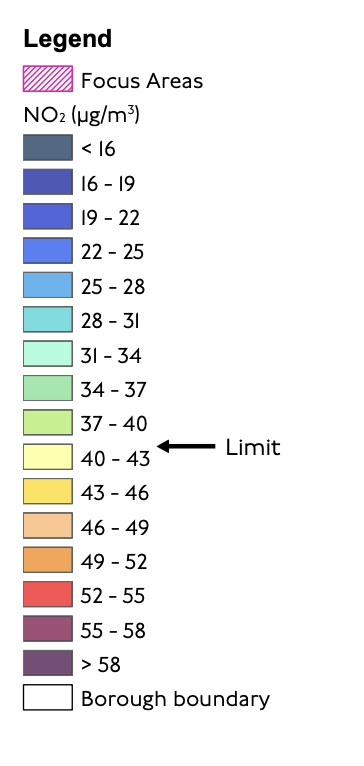

### Lambeth/London
- WHO Interim Target 4 for PM2.5 (10μg/m3) annual mean ahead by 2030
- WHO Interim Target 2 for NO2 (30μg/m3) annual mean by 2030

## Weekly
- Weekly NO2 and PM25, showing levels per hour. Split by weekday/weekend
- Limit line showing national and Lambeth limits as annual mean for PM2.5 and NO2, and hourly limits for NO2

## Monthly
- Monthly trend - average NO2 and PM25 by month, over the past 12 months

## Hourly breaches





SiteCode
CLDP0375    61.079059
CLDP0373    47.060975
CLDP0366    45.694344
CLDP0028    43.822685
CLDP0309    43.069283
              ...    
CLDP0076    18.150340
CLDP0013    17.738041
CLDP0029    17.248830
CLDP0030    16.641562
CLDP0019    13.687207
Name: NO2, Length: 367, dtype: float64

<AxesSubplot: xlabel='NO2', ylabel='Count'>

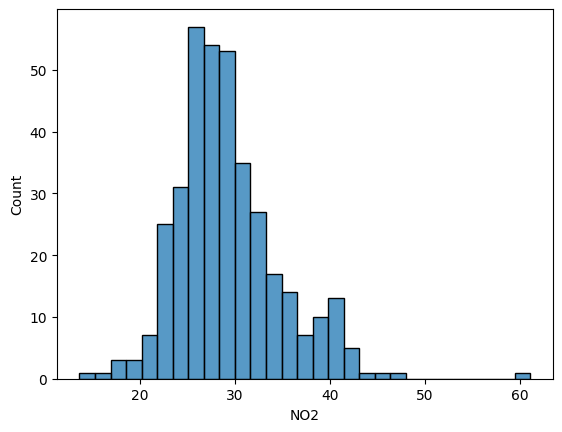

In [8]:
filtered_data.groupby("SiteCode")["NO2"].mean().sort_values(ascending=False)
sns.histplot(data=filtered_data.groupby("SiteCode")["NO2"].mean())

[Text(0, 0.5, 'NO2 (ug/m3)')]

Text(11, 30, 'Lambeth/WHO annual mean target (30ug/m3)')

Text(11, 40, 'UK annual mean target (40ug/m3)')

Text(11, 21.16083811043314, 'Node average (21.2ug/m3)')

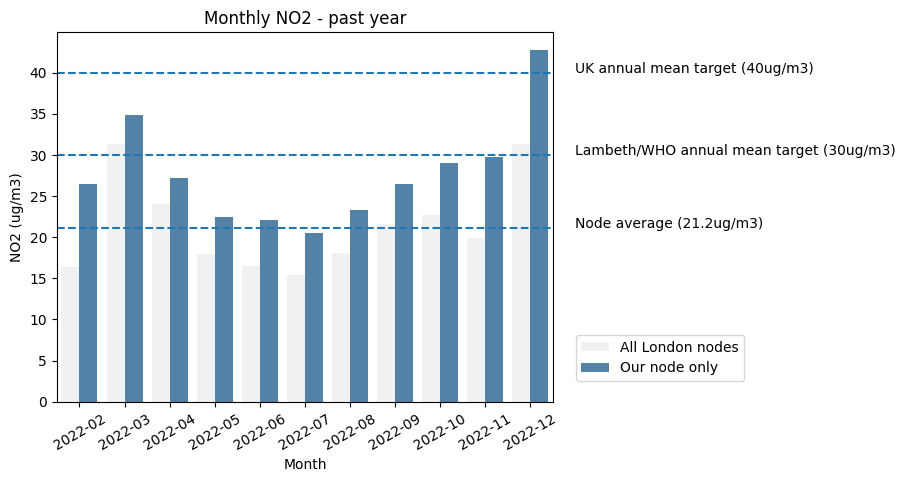

In [78]:
one_year_ago = (datetime.datetime.utcnow().replace(tzinfo=pytz.timezone('Europe/London')) - datetime.timedelta(days=365))
g = sns.barplot(data=interest_data[interest_data["DateTime"] > one_year_ago], 
            x="Month", 
            y="NO2", 
            hue="NodeCategory",
            errorbar=None,
            color="steelblue")

_ = g.set(title='Monthly NO2 - past year')
_ = g.set_xticklabels(g.get_xticklabels(), rotation=30)

g.set(ylabel='NO2 (ug/m3)')

ax1 = g.axes
legend_handles, _= ax1.get_legend_handles_labels()
ax1.legend(legend_handles, ['All London nodes','Our node only'], 
          bbox_to_anchor=(1.4,.2))

lambeth_target = 30
ax1.axhline(lambeth_target, ls='--')
ax1.text(11, lambeth_target, f"Lambeth/WHO annual mean target ({lambeth_target}ug/m3)")

uk_limit = 40
ax1.axhline(uk_limit, ls='--')
ax1.text(11, uk_limit, f"UK annual mean target ({uk_limit}ug/m3)")

node_mean = interest_data[(interest_data["DateTime"] > one_year_ago) & (interest_data["NodeCategory"] == "Node")]["NO2"].mean()
ax1.axhline(node_mean, ls='--')
ax1.text(11, node_mean, f"Node average ({node_mean:.1f}ug/m3)")


[Text(0, 0.5, 'PM2.5 (ug/m3)')]

Text(11, 10, 'Lambeth/WHO annual mean target (10ug/m3)')

Text(11, 25, 'UK annual mean limit (25ug/m3)')

Text(11, 8.910861897467827, 'Node average (8.9ug/m3)')

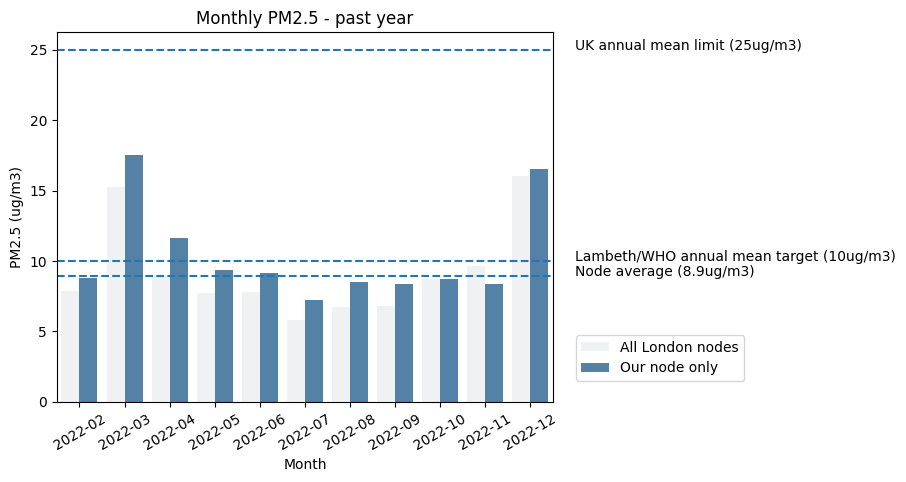

In [79]:
one_year_ago = (datetime.datetime.utcnow().replace(tzinfo=pytz.timezone('Europe/London')) - datetime.timedelta(days=365))
g = sns.barplot(data=interest_data[interest_data["DateTime"] > one_year_ago], 
            x="Month", 
            y="PM25", 
            errorbar=None,
            hue="NodeCategory",
            color="steelblue")

_ = g.set(title='Monthly PM2.5 - past year')
_ = g.set_xticklabels(g.get_xticklabels(), rotation=30)

g.set(ylabel='PM2.5 (ug/m3)')

ax1 = g.axes

legend_handles, _= ax1.get_legend_handles_labels()
ax1.legend(legend_handles, ['All London nodes','Our node only'], 
          bbox_to_anchor=(1.4,.2))

lambeth_target = 10
ax1.axhline(lambeth_target, ls='--')
ax1.text(11, lambeth_target, f"Lambeth/WHO annual mean target ({lambeth_target}ug/m3)")

uk_limit = 25
ax1.axhline(uk_limit, ls='--')
ax1.text(11, uk_limit, f"UK annual mean limit ({uk_limit}ug/m3)")

node_mean = interest_data[(interest_data["DateTime"] > one_year_ago) & (interest_data["NodeCategory"] == "Node")]["PM25"].mean()
ax1.axhline(node_mean, ls='--')
ax1.text(11, node_mean, f"Node average ({node_mean:.1f}ug/m3)")


<AxesSubplot: xlabel='DayOfWeekName', ylabel='NO2'>

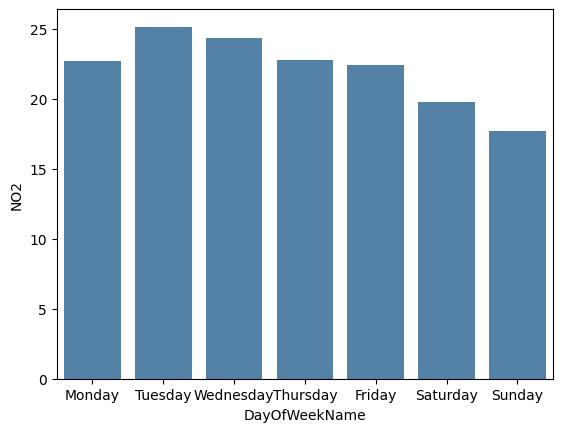

In [37]:
sns.barplot(data=interest_data, 
            x="DayOfWeekName", 
            y="NO2", 
            order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
            errorbar=None,
            color="steelblue")


<AxesSubplot: xlabel='TimeOfDay', ylabel='NO2'>

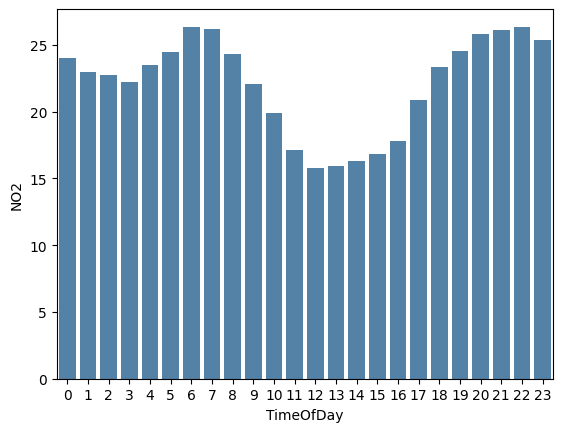

In [39]:
sns.barplot(data=interest_data, 
            x="TimeOfDay", 
            y="NO2", 
            errorbar=None,
            color="steelblue")

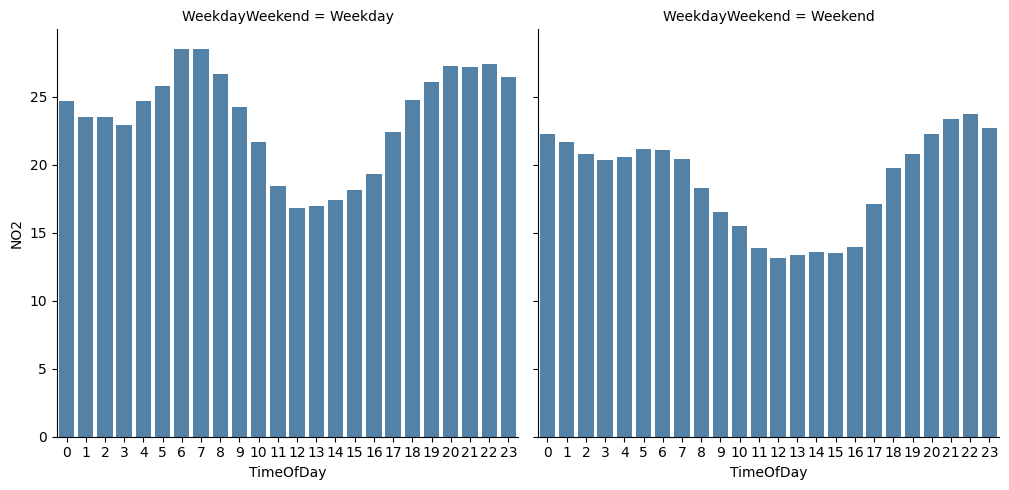

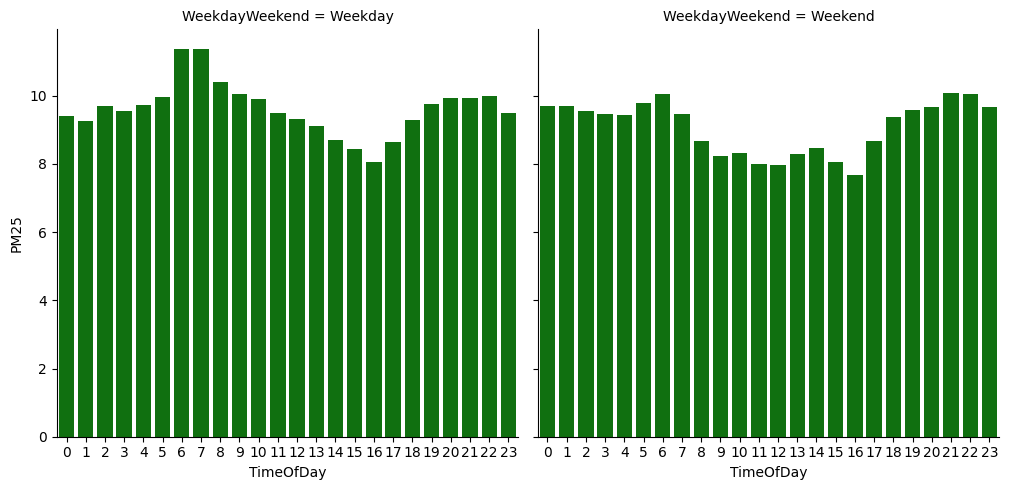

In [76]:
sns.catplot(data=interest_data, 
            x="TimeOfDay", 
            y="NO2", 
            col="WeekdayWeekend",
            errorbar=None,
            kind="bar",
            col_wrap=3,
            color="steelblue")

sns.catplot(data=interest_data, 
            x="TimeOfDay", 
            y="PM25", 
            col="WeekdayWeekend",
            errorbar=None,
            kind="bar",
            col_wrap=3,
            color="green")